## 다중회귀분석 ##

여러 개의 독립변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우 다중회귀분석(Multivariate Regression)을 사용한다. (Y = b+ a1X1+a2X2+a3X3+...+anXn)
각 독립 변수의 계수(a1, a2, a3, a4....an)와 상수항 b에 적절한 값을 찾아 모형을 완성, 모형의 예측값인 종속 변수에 대한 실제 데이터를 알고 있는 상태에서 학습하기 때문에 지도학습으로 분류된다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv파일 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

In [3]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','orgin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,orgin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
# horsepower열의 자료형 변경
df['horsepower'].replace('?', np.nan, inplace=True)
# 누락데이터 행 삭제
df.dropna(subset=['horsepower'], axis= 0, inplace=True)
# 실수형 변환
df['horsepower'] = df['horsepower'].astype('float')

In [5]:
# 분석에 활용할 열 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders','horsepower','weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


In [6]:
# 데이터셋 구분 - 훈련용(train)/검증용(test)

X = ndf[['cylinders','horsepower','weight']]#독립변수 X1, X2, X3
y = ndf['mpg']#종속 변수

In [7]:
# train data와 test data로 구분(7:3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)#랜덤 추출값

print('훈련데이터 :', X_train.shape)
print('검증데이터 :', X_test.shape)


훈련데이터 : (274, 3)
검증데이터 : (118, 3)


In [9]:
# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression #다중회귀분석은 단순,다항회귀분석과 마찬가지로 선형회귀분석 사용

# 모형 객체 생성
Ir = LinearRegression()

# train data를 가지고 모형학습
Ir.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = Ir.score(X_test, y_test)
print(r_square)
# R-square값은 독립변수 3개의 계수가 합쳐진 값
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ', Ir.coef_)#독립변수 3개에 대한 계수가 리스트로 반환
print('\n')

# 회귀식의 y절편
print('상수항 b:', Ir.intercept_)

# 반환된 결정계수 r_square값은 0.6939로 비교적 양호한 수준


0.6939048496695597


X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b: 46.41435126963407


C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


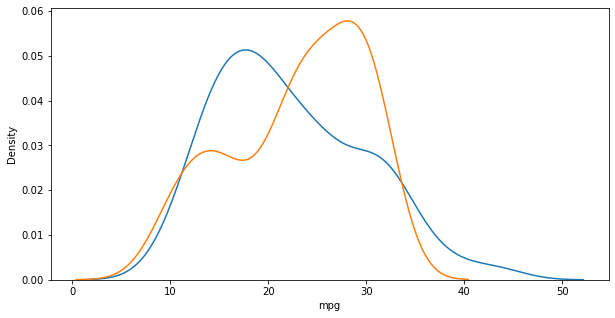

In [12]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력

y_hat = Ir.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)

plt.show()
plt.close()

# 데이터가 어느 한쪽으로 편향되는 경향을 남아 있지만 첨도(뾰족한 정도)는 누그러짐